In [1]:
import pandas as pd
import matplotlib
from src.pipeline.etl import ETL

In [2]:
df = pd.read_csv("bookmarks.csv")
df = df[df['user'] == 909].sort_values("shiur", ascending=False)
df.head()

/var/folders/y3/280rhsjd361c1_hjnxwdj3q40000gn/T/ipykernel_68901/38638260.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bookmarks.csv")


,Unnamed: 0,user,shiur,session,bookmark,timestamp,queue_date,played,date_played,downloaded,date_downloaded,duration,listen_percentage
201,26773,909,1093824,00000000-0000-0000-0000-000000000000,queue,0.0,2024-03-26 09:14:01.430000,0,NaN,0,NaN,766.327,0.0
342,48944,909,1088750,00000000-0000-0000-0000-000000000000,queue,0.0,2024-02-08 09:49:39.080000,0,NaN,0,NaN,2284.633,0.0
998,53619,909,1087752,00000000-0000-0000-0000-000000000000,queue,0.0,2024-01-30 15:29:38.120000,0,NaN,0,NaN,2842.247,0.0
1011,54628,909,1087613,00000000-0000-0000-0000-000000000000,queue,0.0,2024-01-30 15:33:53.183000,0,NaN,0,NaN,1714.897,0.0
911,55391,909,1087235,00000000-0000-0000-0000-000000000000,queue,0.0,2024-01-30 15:46:53.780000,0,NaN,0,NaN,5599.947,0.0


In [4]:
df.to_csv("bookmarks_909.csv")

In [8]:
df['listen_percentage'].value_counts()

listen_percentage
0.000    904
0.070      6
0.015      6
0.016      6
0.013      6
        ... 
0.049      1
0.029      1
0.378      1
0.715      1
0.328      1
Name: count, Length: 125, dtype: int64

In [19]:
listen = df['listen_percentage']
listen = listen[listen != 0]

<Axes: >

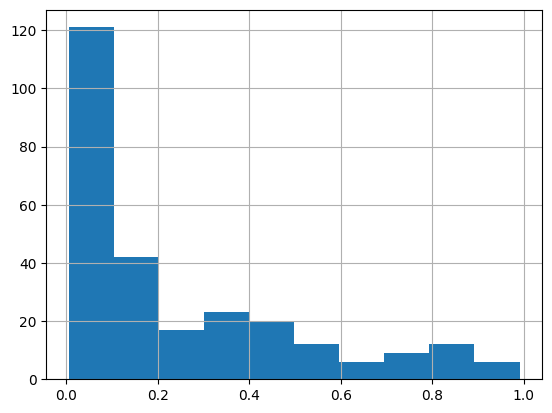

In [20]:
listen.hist()

In [21]:
listen.value_counts()

listen_percentage
0.070    6
0.015    6
0.016    6
0.013    6
0.027    5
        ..
0.049    1
0.452    1
0.378    1
0.715    1
0.029    1
Name: count, Length: 124, dtype: int64